In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from pokedex.utils_dataset import create_dataset, reduce_dataset, crop_card
from pokedex.augmentation import get_augment_data
from pokedex.modeling import preprocessing

# Create datasets

In [65]:
df = create_dataset()

On-going set: dv1
On-going set: swsh9
On-going set: swsh45
On-going set: swsh6
On-going set: swsh12pt5
On-going set: xy1
On-going set: xy2
Failed to retrieve image. HTTP Status code: 404
On-going set: xy3
Failed to retrieve image. HTTP Status code: 404
On-going set: g1
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to retrieve image. HTTP Status code: 404
Failed to 

In [66]:
df.to_json('../../raw_data/dict_dataset_full.json')

In [67]:
reduce_dataset('../../raw_data/dict_dataset_full.json')

In [ ]:
df_right = get_augment_data('../../raw_data/dict_reduceddataset_right.json')
df_left = get_augment_data('../../raw_data/dict_reduceddataset_left.json')

# Model

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
HARD_CODED_HEIGHT = 72
HARD_CODED_WIDTH = 200

In [51]:
nb_epochs=20
batch_size=32

In [59]:
X_train, y_train, X_val, y_val, X_test, y_test, label_encoder = preprocessing('../../raw_data/dict_reduceddataset_left.json')

In [50]:
model = Sequential([
    layers.Conv2D(32, (5,5), padding='same', activation="relu", input_shape=(HARD_CODED_HEIGHT,HARD_CODED_WIDTH,1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/Users/estelle/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs = nb_epochs,
    batch_size = batch_size,
    validation_data = (X_val, y_val),
    callbacks = es,
    verbose = 1
)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - accuracy: 0.3738 - loss: 1.9691 - val_accuracy: 0.8162 - val_loss: 0.6130
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.8638 - loss: 0.4504 - val_accuracy: 0.8970 - val_loss: 0.3169
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.9471 - loss: 0.1701 - val_accuracy: 0.9434 - val_loss: 0.1614
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.9814 - loss: 0.0676 - val_accuracy: 0.9434 - val_loss: 0.1695
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.9901 - loss: 0.0504 - val_accuracy: 0.9737 - val_loss: 0.0869
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9657 - val_loss: 0.1400
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.9959 - loss: 0.0163 - val_accuracy: 0.9657 - val_loss: 0.1381
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - accuracy: 0.9969 - loss: 0.0162 - val_accu

In [53]:
model.evaluate(X_test,y_test, return_dict=True)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9903 - loss: 0.0245


{'accuracy': 0.9939393997192383, 'loss': 0.0163497943431139}

# Prediction

In [63]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

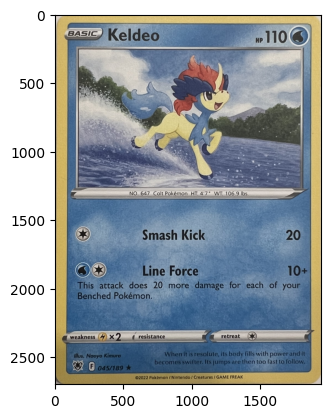

In [64]:
png_filepath = '../../raw_data/PokemonCards/IMG_1488 copy.jpeg'
png_pil_img = Image.open(png_filepath)
plt.imshow(png_pil_img)

In [56]:
card_image = np.array(png_pil_img)
new_array = cv2.resize(card_image, (600, 825))

In [57]:
graybottomleft, graybottomright = crop_card(new_array)

In [58]:
model.predict(graybottomleft)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
label_encoder.classes_

array(['no', 'sm4', 'sv2', 'sv3', 'sv3pt5', 'sv4', 'swsh10', 'swsh12pt5',
       'swsh45', 'swsh6', 'swsh9'], dtype=object)